In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
data = pd.read_csv("gld_price_data.csv")

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
data.shape

(2290, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
corrletaion = data.corr()
corrletaion["GLD"].sort_values(ascending=False)

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

C:\Users\govind\AppData\Local\Temp\ipykernel_9024\3386204071.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["GLD"],color="r")


<AxesSubplot: xlabel='GLD', ylabel='Density'>

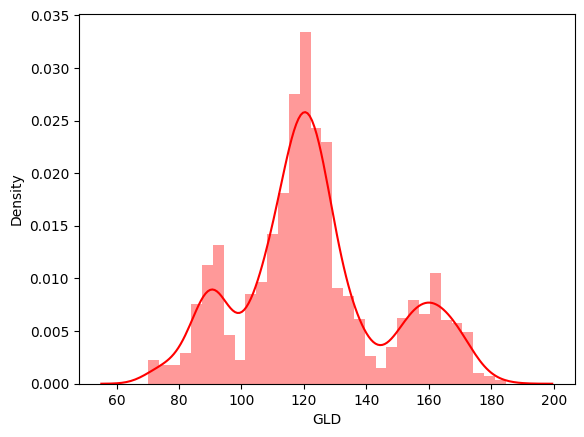

In [10]:
sns.distplot(data["GLD"],color="r")

In [11]:
data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [12]:
x = data.drop(["Date","GLD"],axis=1)

In [13]:
y = data["GLD"]

In [14]:
data.shape

(2290, 6)

In [15]:
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.head()

,SPX,USO,SLV,EUR/USD
1018,1413.489990,36.220001,28.920000,1.253447
1870,2085.449951,11.740000,16.420000,1.132824
118,1245.359985,109.250000,18.545000,1.585590
220,805.219971,28.660000,11.090000,1.288494
2053,2328.949951,11.130000,17.530001,1.061639


In [17]:
y_train

,SPX,USO,SLV,EUR/USD
2178,2602.419922,11.790000,16.080000,1.185396
1271,1752.069946,34.990002,21.870001,1.380396
1268,1744.660034,35.939999,21.410000,1.367596
44,1304.339966,83.889999,20.075001,1.538509
2025,2381.919922,11.170000,16.799999,1.053585
...,...,...,...,...
1872,2000.540039,11.190000,16.870001,1.101503
1075,1415.949951,32.169998,33.130001,1.295337
299,888.330017,33.380001,14.340000,1.400305
306,942.460022,37.689999,15.630000,1.397194


In [18]:
x_test.head()

1018    160.539993
1870    120.900002
118      94.440002
220      84.519997
2053    122.599998
Name: GLD, dtype: float64

In [19]:
Model = LinearRegression()

In [20]:
pred = Model.fit(x_train,x_test)

In [21]:
pred

LinearRegression()

In [22]:
testing = pred.predict(x_train)

In [23]:
x_test.head(3)

1018    160.539993
1870    120.900002
118      94.440002
Name: GLD, dtype: float64

In [24]:
x_test.tail()

1638    112.839996
1095    162.020004
1130    152.619995
1294    119.459999
860     169.399994
Name: GLD, dtype: float64

In [25]:
error = metrics.r2_score(testing,x_test)

In [26]:
error

0.8599951526819504

In [27]:
new = pred.predict(y_train)

In [28]:
# new

In [29]:
# y_test

In [30]:
metrics.r2_score(new,y_test)

0.8763075040332999

In [31]:
x_train

,SPX,USO,SLV,EUR/USD
1018,1413.489990,36.220001,28.920000,1.253447
1870,2085.449951,11.740000,16.420000,1.132824
118,1245.359985,109.250000,18.545000,1.585590
220,805.219971,28.660000,11.090000,1.288494
2053,2328.949951,11.130000,17.530001,1.061639
...,...,...,...,...
1638,2095.840088,19.660000,15.480000,1.120787
1095,1426.189941,33.369999,29.370001,1.322769
1130,1502.420044,33.430000,27.730000,1.327316
1294,1807.229980,33.189999,18.959999,1.356779


In [32]:
test = [[1500,38,30,2]]

In [33]:
pred.predict(test)

C:\Users\govind\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([143.3803766])

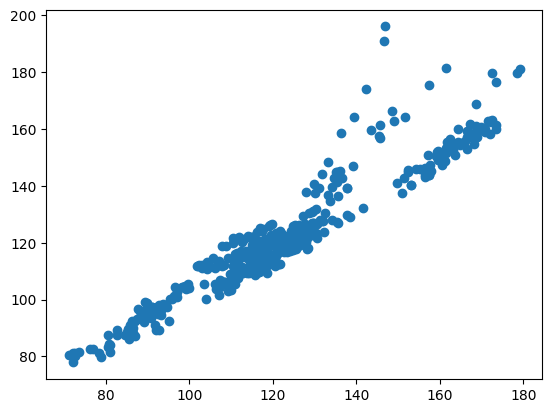

In [34]:
plt.scatter(y_test,new)

In [35]:
y_test = list(y_test)

In [36]:
type(y_test)

list

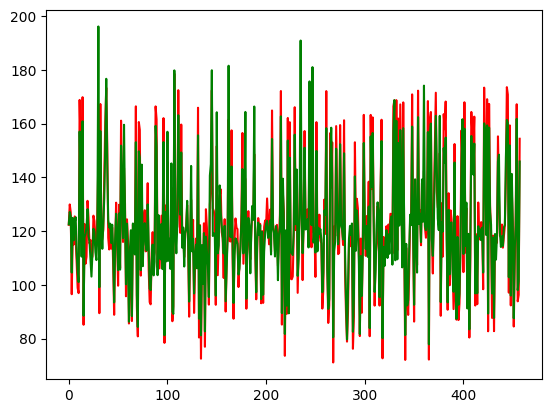

In [37]:
plt.plot(y_test,color='red',label="true value")
plt.plot(new,color="green",label="predicted values")